In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os, uuid
from azure.identity import DefaultAzureCredential
from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient
from io import BytesIO
warnings.filterwarnings('ignore')
sns.set()

In [60]:
connect_str = os.getenv('AZURE_STORAGE_CONNECTION_STRING')
blob_service_client = BlobServiceClient.from_connection_string(connect_str)
container_client = blob_service_client.get_container_client("data")

In [61]:
def download_blob_to_df(blob_name):
    blob_client = container_client.get_blob_client(blob_name)
    download_stream = blob_client.download_blob()
    blob_data = BytesIO(download_stream.readall())
    return pd.read_csv(blob_data)

In [62]:
humanForYou = download_blob_to_df("HumanForYou_datas.csv")

In [63]:
humanForYou.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,AverageHours
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,6,1,0,0,3,3,3.0,4.0,2.0,6.952964
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,3,5,1,4,2,4,3.0,2.0,4.0,6.477878
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,2,5,0,3,3,3,2.0,2.0,1.0,6.452345
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,5,8,7,5,2,3,4.0,4.0,3.0,7.486690
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,2,6,0,4,3,3,4.0,1.0,3.0,9.765934


In [64]:
# Suppression des valeurs non éthiques

humanForYouCopy = humanForYou.copy()

humanForYouCopy.drop("Age", axis=1, inplace=True)
humanForYouCopy.drop("Over18", axis=1, inplace=True)
humanForYouCopy.drop("Gender", axis=1, inplace=True)
humanForYouCopy.drop("MaritalStatus", axis=1, inplace=True)

In [65]:
humanForYouCopy.describe()

,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,AverageHours
count,4409.000000,4409.000000,4409.0,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4409.0,4409.000000,...,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000
mean,9.188251,2.912905,1.0,2205.000000,2.063960,65031.660240,2.688138,15.210252,8.0,0.794058,...,2.798594,7.004990,2.187571,4.122023,2.729644,3.153776,2.725561,2.729417,2.763438,6.951532
std,8.100992,1.024048,0.0,1272.912998,1.106814,47073.969139,2.495922,3.659203,0.0,0.851896,...,1.288222,6.122203,3.222042,3.566975,0.711223,0.360775,1.089665,1.099021,0.703612,1.264866
min,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000,5.148103
25%,2.000000,2.000000,1.0,1103.000000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,...,2.000000,3.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,5.967442
50%,7.000000,3.000000,1.0,2205.000000,2.000000,49080.000000,2.000000,14.000000,8.0,1.000000,...,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.663351
75%,14.000000,4.000000,1.0,3307.000000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,...,3.000000,9.000000,3.000000,7.000000,3.000000,3.000000,4.000000,4.000000,3.000000,7.508901
max,29.000000,5.000000,1.0,4409.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,...,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000,10.394573


In [66]:
# Suppression des valeurs inutiles

humanForYouCopy.drop("EmployeeCount", axis=1, inplace=True)
humanForYouCopy.drop("EmployeeID", axis=1, inplace=True)



In [67]:
# Encodage des variables catégorielles

from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

humanForYouCopy["BusinessTravel"] = encoder.fit_transform(humanForYouCopy[["BusinessTravel"]])
humanForYouCopy["Department"] = encoder.fit_transform(humanForYouCopy[["Department"]])
humanForYouCopy["EducationField"] = encoder.fit_transform(humanForYouCopy[["EducationField"]])
humanForYouCopy["JobRole"] = encoder.fit_transform(humanForYouCopy[["JobRole"]])

humanForYouCopy["Attrition"] = humanForYouCopy["Attrition"].map({"Yes": 1, "No": 0})

humanForYouCopy["PercentSalaryHike"] = humanForYouCopy["PercentSalaryHike"] / 100

# Verification de si les standardsHours sont bien respectés à partir de AverageHours en renvoyant 0 si c'est le cas et 1 sinon

humanForYouCopy["StandardHoursRespected"] = humanForYouCopy["StandardHours"] - humanForYouCopy["AverageHours"]
humanForYouCopy["StandardHoursRespected"] = humanForYouCopy["StandardHoursRespected"].apply(lambda x: 0 if x == 0 else 1)

humanForYouCopy.drop("StandardHours", axis=1, inplace=True)
humanForYouCopy.drop("AverageHours", axis=1, inplace=True)

In [68]:
humanForYouCopy = humanForYouCopy.fillna(0)

<Axes: >

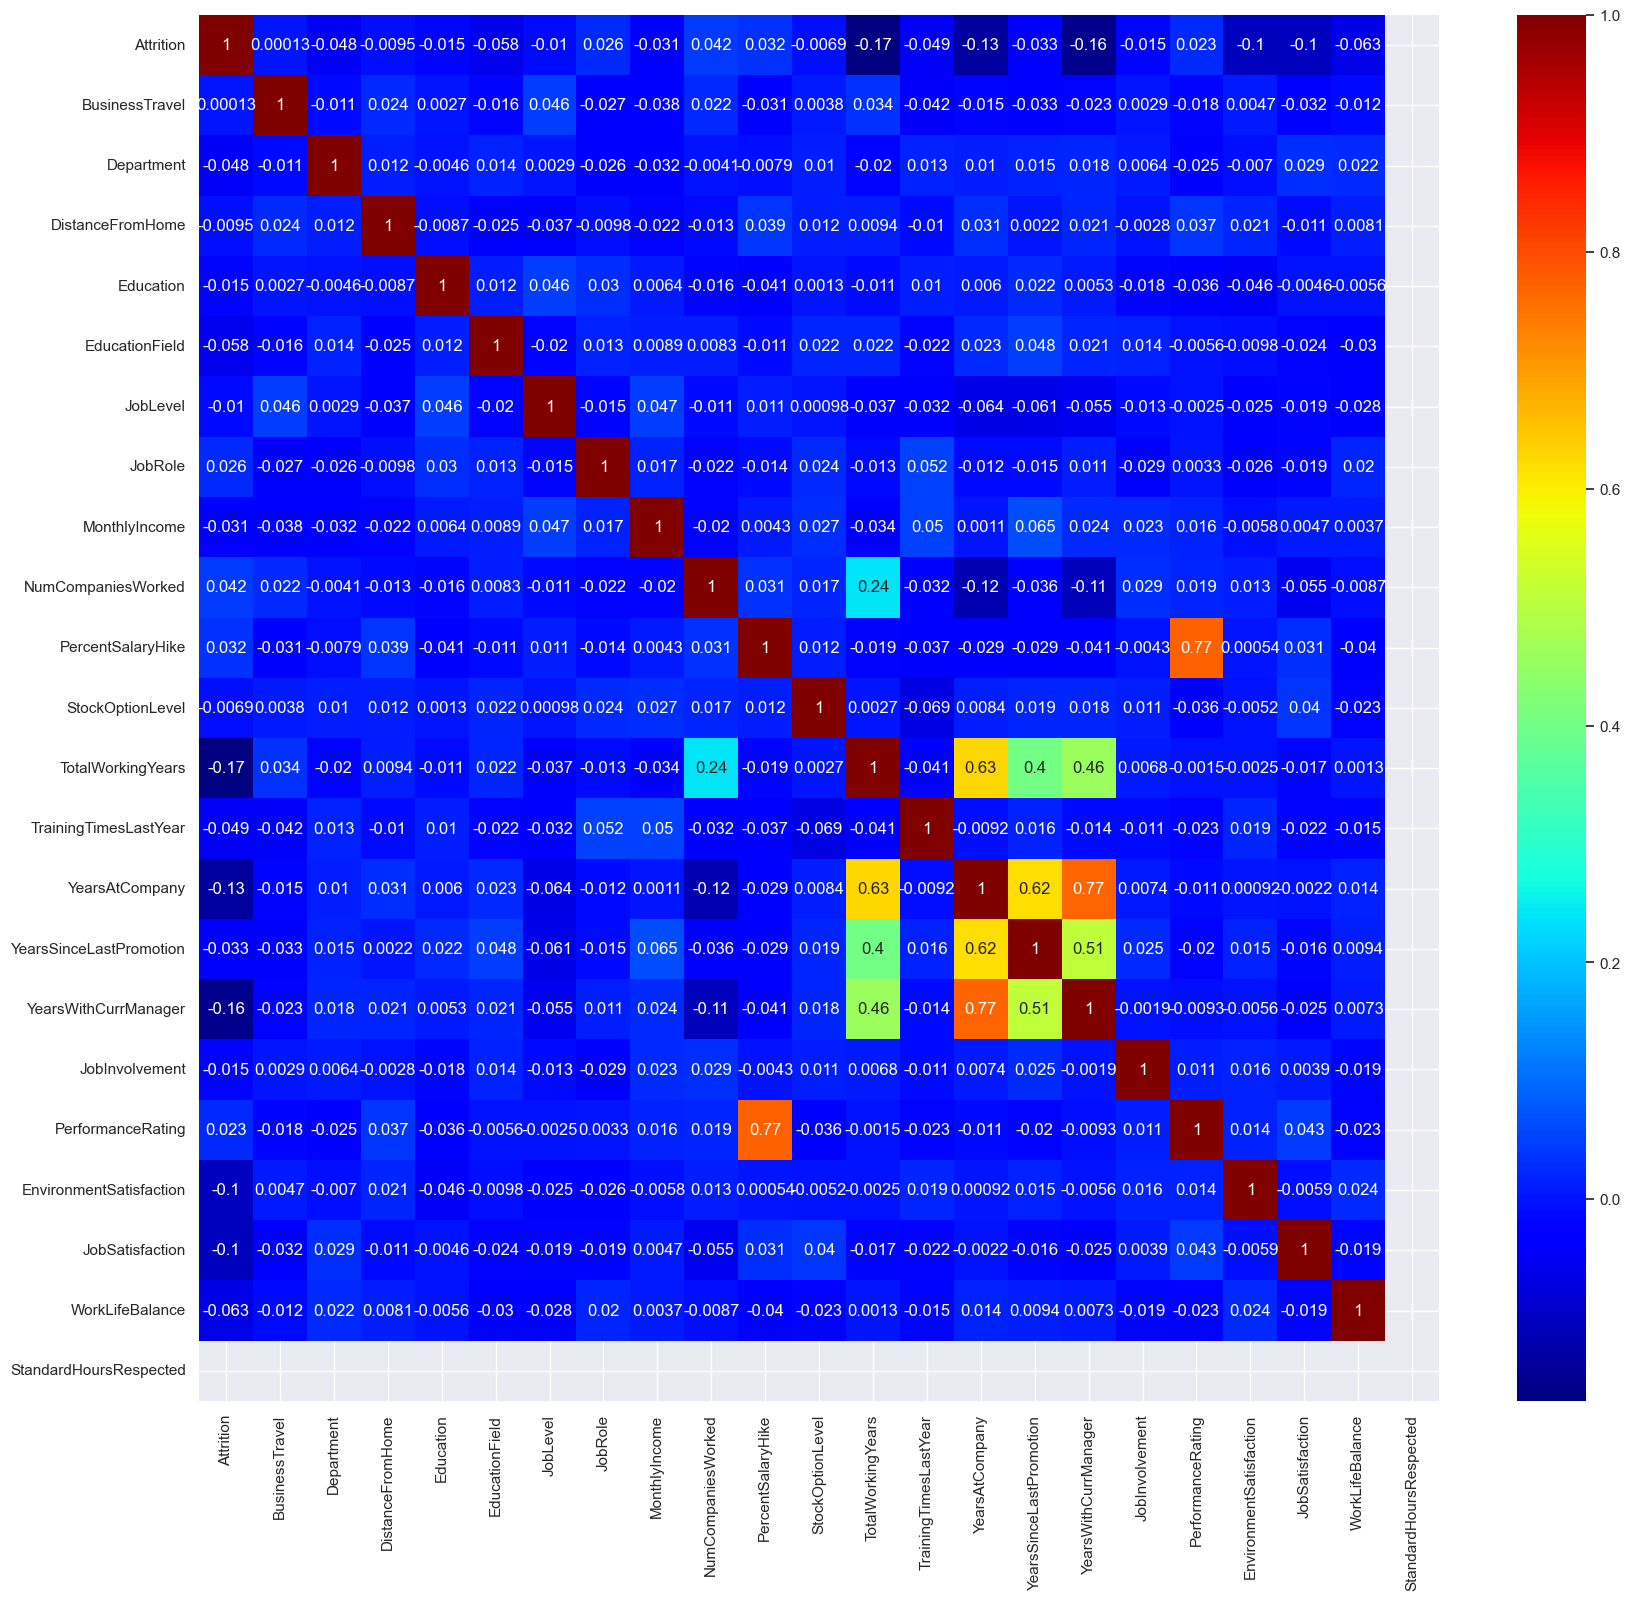

In [69]:
# Visualisation des corrélations

corr_matrix = humanForYouCopy.corr()

plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, cmap=plt.get_cmap("jet"))



<Axes: >

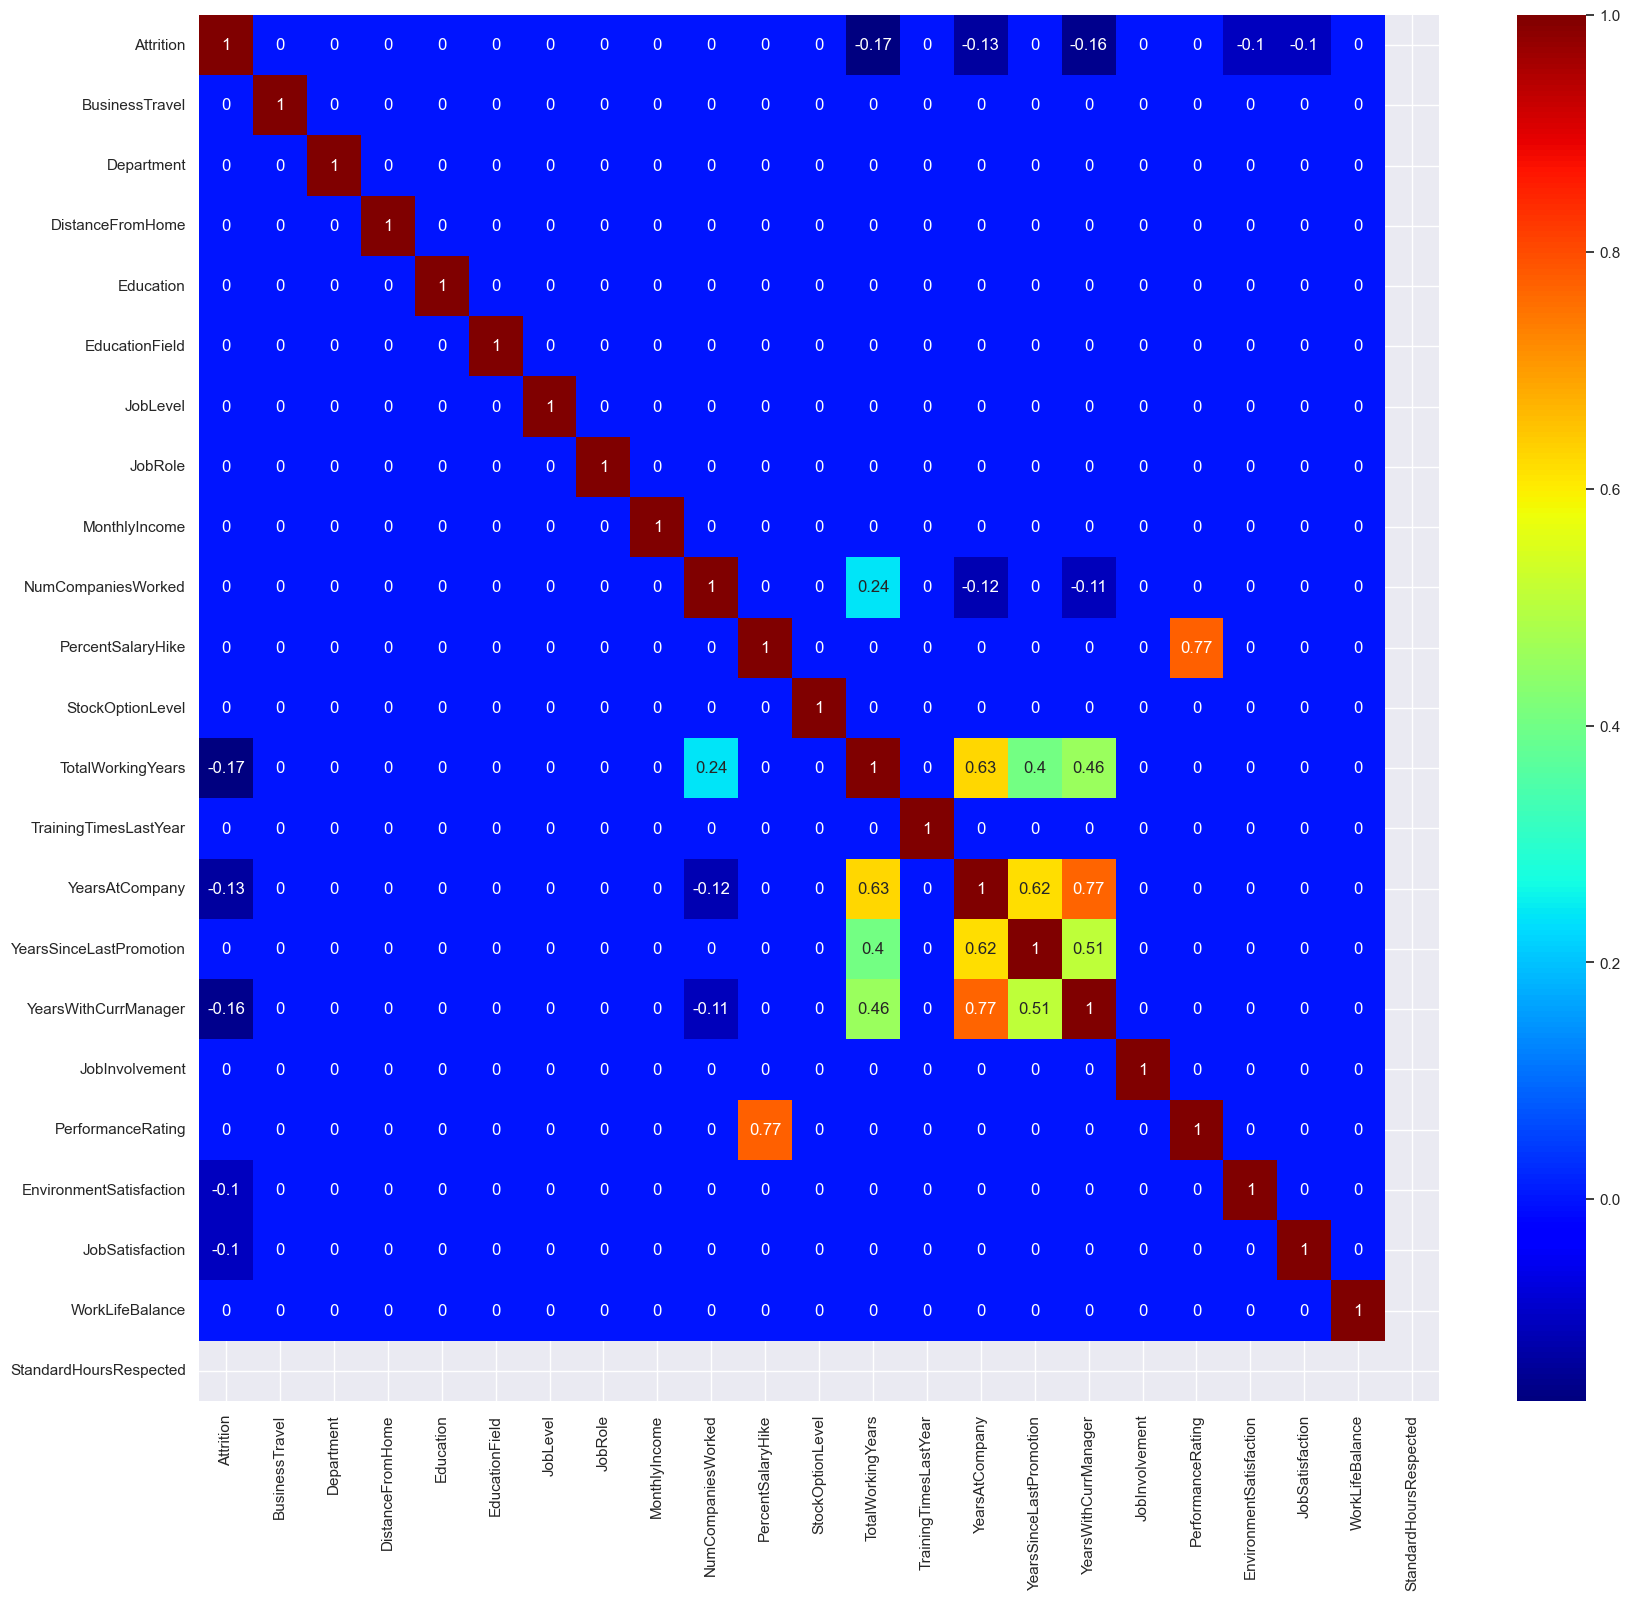

In [70]:
# Set value between -0.1 and 0.1 to 0 to remove noise

for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) < 0.1:
            corr_matrix.iloc[i, j] = 0
            
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, cmap=plt.get_cmap("jet"))

In [71]:
# Suppression des colonnes non corrélées

humanForYouCopy.drop("BusinessTravel", axis=1, inplace=True)
humanForYouCopy.drop("Department", axis=1, inplace=True)
humanForYouCopy.drop("EducationField", axis=1, inplace=True)
humanForYouCopy.drop("JobRole", axis=1, inplace=True)
humanForYouCopy.drop("StandardHoursRespected", axis=1, inplace=True)
humanForYouCopy.drop("DistanceFromHome", axis=1, inplace=True)
humanForYouCopy.drop("Education", axis=1, inplace=True)
humanForYouCopy.drop("JobLevel", axis=1, inplace=True)
humanForYouCopy.drop("MonthlyIncome", axis=1, inplace=True)
humanForYouCopy.drop("NumCompaniesWorked", axis=1, inplace=True)
humanForYouCopy.drop("PercentSalaryHike", axis=1, inplace=True)
humanForYouCopy.drop("StockOptionLevel", axis=1, inplace=True)
humanForYouCopy.drop("TrainingTimesLastYear", axis=1, inplace=True)
humanForYouCopy.drop("YearsSinceLastPromotion", axis=1, inplace=True)
humanForYouCopy.drop("JobInvolvement", axis=1, inplace=True)
humanForYouCopy.drop("PerformanceRating", axis=1, inplace=True)
humanForYouCopy.drop("WorkLifeBalance", axis=1, inplace=True)

In [72]:
humanForYouCopy.head()

,Attrition,TotalWorkingYears,YearsAtCompany,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction
0,0,1.0,1,0,3.0,4.0
1,1,6.0,5,4,3.0,2.0
2,0,5.0,5,3,2.0,2.0
3,0,13.0,8,5,4.0,4.0
4,0,9.0,6,4,4.0,1.0


In [73]:
def save_df_to_blob(dataframe, container_name, blob_name, connection_string):
    blob_io = BytesIO()
    dataframe.to_csv(blob_io, index=False)
    blob_io.seek(0)

    blob_service_client = BlobServiceClient.from_connection_string(connection_string)

    blob_client = blob_service_client.get_container_client(container_name).get_blob_client(blob_name)

    blob_client.upload_blob(blob_io, blob_type="BlockBlob", overwrite=True)

In [75]:
save_df_to_blob(humanForYouCopy, 'data', 'DataCleaned.csv', os.getenv('AZURE_STORAGE_CONNECTION_STRING'))